In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style='whitegrid')
try:
    df = pd.read_csv('../Data/birds_db.csv')
except FileNotFoundError:
    print("Dataset not found.")
    exit()

target_species = 'Collared flycatcher'
bird_data = df[df['species'] == target_species].copy()

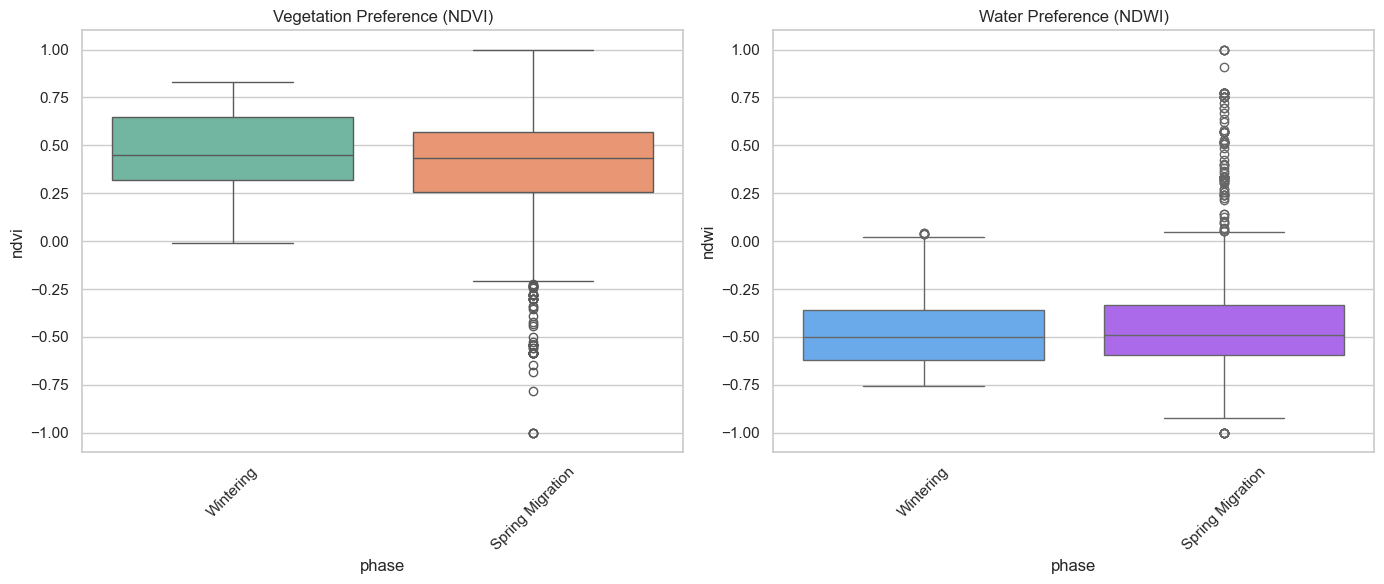

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=bird_data, x='phase', y='ndvi', hue='phase', palette='Set2', legend=False, ax=axes[0])
axes[0].set_title('Vegetation Preference (NDVI)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=bird_data, x='phase', y='ndwi', hue='phase', palette='cool', legend=False, ax=axes[1])
axes[1].set_title('Water Preference (NDWI)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('Results/BoxPlot.png')
plt.show()

In [ ]:
summary = bird_data.groupby('phase')[['ndvi', 'ndwi']].agg(['mean', 'std', 'count'])
print('Statistical Summary by Zone:')
print(summary)